In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [582]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sulteng.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  361 non-null    datetime64[ns]
 1   Tn       360 non-null    float64       
 2   Tx       358 non-null    float64       
 3   Tavg     348 non-null    float64       
 4   RH_avg   348 non-null    float64       
 5   RR       354 non-null    float64       
 6   ss       360 non-null    float64       
 7   ff_x     360 non-null    float64       
 8   ddd_x    360 non-null    float64       
 9   ff_avg   360 non-null    float64       
 10  ddd_car  360 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.1+ KB


<ipython-input-582-2938ac7888ac>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [583]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.0,33.8,0.0,27.9
1,2023-02-01,22.4,33.2,0.0,27.6
2,2023-03-01,21.4,36.2,0.1,28.4
3,2023-04-01,21.6,35.6,8888.0,29.8
4,2023-05-01,22.6,36.4,0.0,29.7
...,...,...,...,...,...
356,2023-12-12,23.6,35.0,0.0,29.3
357,2023-12-13,23.8,36.0,0.0,29.1
358,2023-12-14,24.2,34.0,0.0,28.4
359,2023-12-15,24.8,34.8,0.0,29.1


In [584]:
# cek duplikat
df1.duplicated().sum()

11

In [585]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [586]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [587]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.0,33.8,0.0,27.9
1,31,31,2023-01-02,22.0,29.8,0.1,26.1
2,59,60,2023-01-03,22.0,31.8,7.7,26.0
3,90,92,2023-01-04,22.8,31.6,0.0,26.2
4,120,123,2023-01-05,23.0,35.2,0.0,28.7
...,...,...,...,...,...,...,...
345,345,356,2023-12-12,23.6,35.0,0.0,29.3
346,346,357,2023-12-13,23.8,36.0,0.0,29.1
347,347,358,2023-12-14,24.2,34.0,0.0,28.4
348,348,359,2023-12-15,24.8,34.8,0.0,29.1


In [588]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          3
RR          7
Tavg       13
dtype: int64

In [589]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mavg = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

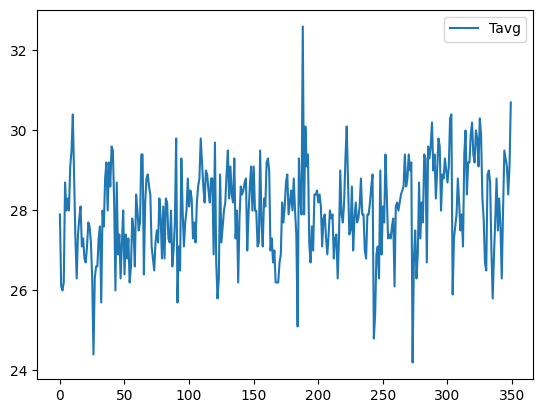

In [590]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

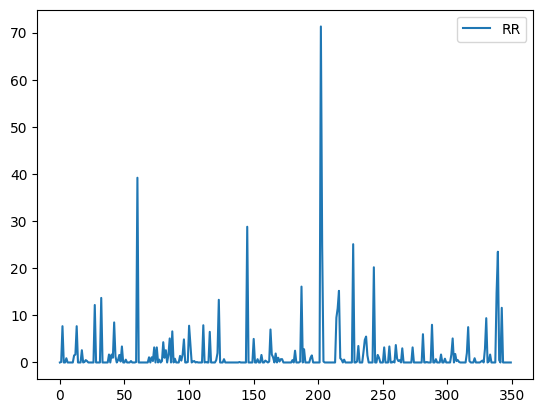

In [591]:
#plotting tavg
df1[['RR']].plot()

In [592]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 50 :
    print(row)

level_0                    202
index                      208
Tanggal    2023-07-22 00:00:00
Tn                        23.2
Tx                        34.6
RR                        71.3
Tavg                      28.1
Name: 202, dtype: object


In [593]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 50 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

<Axes: >

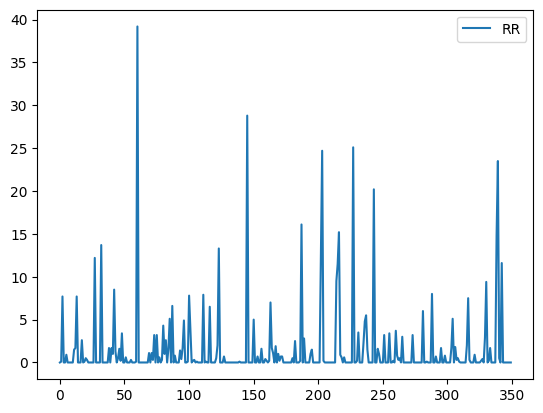

In [594]:
df1[['RR']].plot()

In [595]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.0,33.8,0.0,27.9,29.8,26.1,0.1
1,31,31,2023-01-02,22.0,29.8,0.1,26.1,31.8,26.0,7.7
2,59,60,2023-01-03,22.0,31.8,7.7,26.0,31.6,26.2,0.0
3,90,92,2023-01-04,22.8,31.6,0.0,26.2,35.2,28.7,0.0
4,120,123,2023-01-05,23.0,35.2,0.0,28.7,33.4,28.0,0.9
...,...,...,...,...,...,...,...,...,...,...
345,345,356,2023-12-12,23.6,35.0,0.0,29.3,36.0,29.1,0.0
346,346,357,2023-12-13,23.8,36.0,0.0,29.1,34.0,28.4,0.0
347,347,358,2023-12-14,24.2,34.0,0.0,28.4,34.8,29.1,0.0
348,348,359,2023-12-15,24.8,34.8,0.0,29.1,34.8,30.7,0.0


In [596]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.1,0.1
1,0.1,26.1,26.0,7.7
2,7.7,26.0,26.2,0.0
3,0.0,26.2,28.7,0.0
4,0.0,28.7,28.0,0.9
...,...,...,...,...
345,0.0,29.3,29.1,0.0
346,0.0,29.1,28.4,0.0
347,0.0,28.4,29.1,0.0
348,0.0,29.1,30.7,0.0


In [597]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.1,0.1
1,0.1,26.1,26.0,7.7
2,7.7,26.0,26.2,0.0
3,0.0,26.2,28.7,0.0
4,0.0,28.7,28.0,0.9
...,...,...,...,...
344,0.0,29.5,29.3,0.0
345,0.0,29.3,29.1,0.0
346,0.0,29.1,28.4,0.0
347,0.0,28.4,29.1,0.0


In [598]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [599]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.9,26.1,0.1,0
1,0.1,26.1,26.0,7.7,1
2,7.7,26.0,26.2,0.0,2
3,0.0,26.2,28.7,0.0,3
4,0.0,28.7,28.0,0.9,4
...,...,...,...,...,...
344,0.0,29.5,29.3,0.0,344
345,0.0,29.3,29.1,0.0,345
346,0.0,29.1,28.4,0.0,346
347,0.0,28.4,29.1,0.0,347


In [600]:
#data training dan testing
X = df1['Indeks']
y = df1["pta"]

X1 = df1['pta']
y1 = df1["ptr"]

In [601]:
#data spliting temperatur
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [602]:
X_train = np.array(X_train).reshape(-1, 1)

In [603]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [604]:
#testing
X_test1 = np.array(X_test).reshape(-1, 1)
pred1 = lr.predict(X_test1)
pred1

array([27.98050499, 27.98157011, 27.98263522, 27.98370033, 27.98476545,
       27.98583056, 27.98689567, 27.98796079, 27.9890259 , 27.99009101,
       27.99115613, 27.99222124, 27.99328635, 27.99435147, 27.99541658,
       27.99648169, 27.99754681, 27.99861192, 27.99967703, 28.00074214,
       28.00180726, 28.00287237, 28.00393748, 28.0050026 , 28.00606771,
       28.00713282, 28.00819794, 28.00926305, 28.01032816, 28.01139328,
       28.01245839, 28.0135235 , 28.01458862, 28.01565373, 28.01671884,
       28.01778396, 28.01884907, 28.01991418, 28.0209793 , 28.02204441,
       28.02310952, 28.02417464, 28.02523975, 28.02630486, 28.02736998,
       28.02843509, 28.0295002 , 28.03056532, 28.03163043, 28.03269554,
       28.03376066, 28.03482577, 28.03589088, 28.036956  , 28.03802111,
       28.03908622, 28.04015134, 28.04121645, 28.04228156, 28.04334668,
       28.04441179, 28.0454769 , 28.04654202, 28.04760713, 28.04867224,
       28.04973736, 28.05080247, 28.05186758, 28.0529327 , 28.05

In [605]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

1.1221040654211414

In [606]:
X_test['Indeks'] = X_test.index
X_test

279                                                     279
280                                                     280
281                                                     281
282                                                     282
283                                                     283
                                ...                        
345                                                     345
346                                                     346
347                                                     347
348                                                     348
Indeks    Int64Index([279, 280, 281, 282, 283, 284, 285,...
Name: Indeks, Length: 71, dtype: object

In [607]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
279,27.980505
280,27.981570
281,27.982635
282,27.983700
283,27.984765
...,...
344,28.049737
345,28.050802
346,28.051868
347,28.052933


In [608]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-608-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.9,NaN
1,26.1,NaN
2,26.0,NaN
3,26.2,NaN
4,28.7,NaN
...,...,...
344,29.5,28.049737
345,29.3,28.050802
346,29.1,28.051868
347,28.4,28.052933


<Axes: >

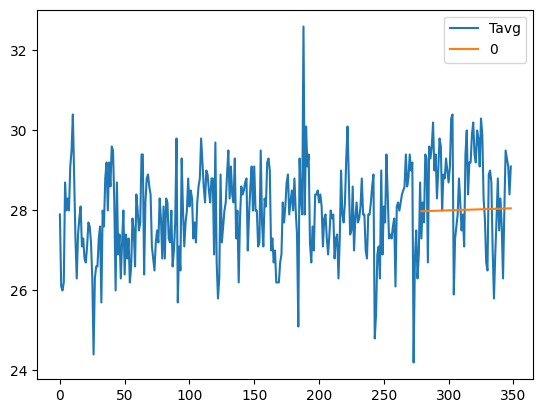

In [609]:
kan.plot()

In [610]:
new_data = [[0],[1],[2],[3],[4],[5],[6]]
lr.predict(new_data)

array([27.68333838, 27.68440349, 27.6854686 , 27.68653372, 27.68759883,
       27.68866394, 27.68972906])

In [611]:
kan.to_json('prediksi')